In [228]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.drop(['RowNumber'],axis=1,inplace=True)
churn_data['Exited_txt'] = churn_data['Exited'].apply(lambda x: 'Exited' if x==1 else 'Loyal')
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

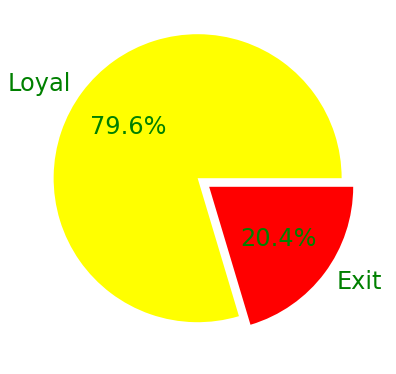

In [102]:
# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
tot_clients = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    tot_clients,
    labels=["Loyal", "Exit"],
    autopct='%.1f%%',
    explode = [0.1, 0],
    colors = ["yellow",'red'],
    textprops={"color" : "green",
               "size" : "24"}
);

Лояльных пользователей в 4 раза больше чем ушедших клиентов

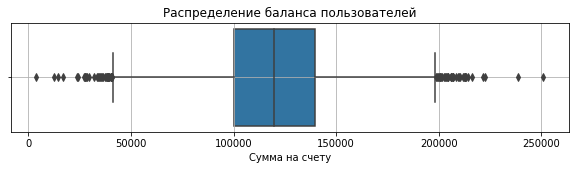

In [93]:
# 9.2. Постройте график, показывающий распределение баланса пользователей, 
# у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.
fig = plt.figure(figsize=(10, 2))
boxplot = sns.boxplot(
    data=churn_data[churn_data['Balance']>2500],
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса пользователей');
boxplot.set_xlabel('Сумма на счету');
boxplot.grid()

Пользователи держат на счету суммы от 40 до 200 тысяч, при этом у большинства этот показатель от 100до 140 тысяч.
Распределение сумм на счету пользователей симметричное относительно медианного значения 120 тысяч.

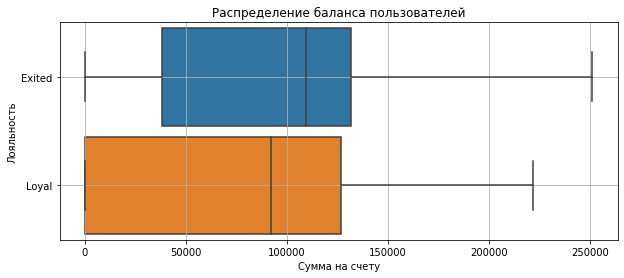

In [195]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited_txt',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса пользователей');
boxplot.set_xlabel('Сумма на счету');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

Пользователи с большими суммами на накопительном счёте чаще уходят.
Вероятные причины ухода клиентов следует искать в предлагаемых условиях хранения средств на накопительном счете.

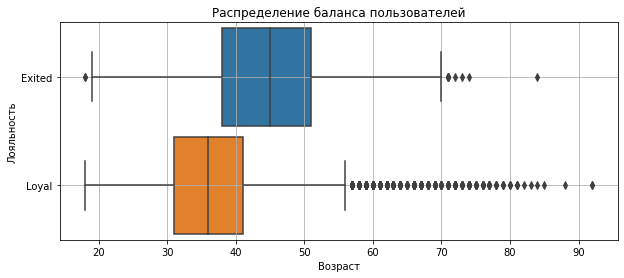

In [109]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited_txt',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса пользователей');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

В какой группе лояльных пользователей большое потенциальных выбросов для возрастов 60+ лет.
Банку следует обратить внимание на возрастную группу клиентов 40-50 лет.

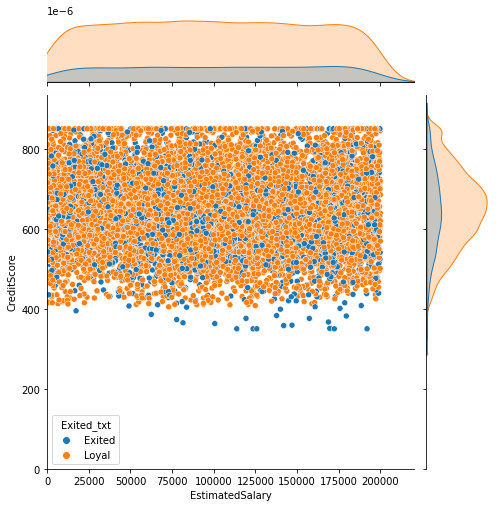

In [127]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.
jointplot = sns.jointplot(
    data=churn_data, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited_txt',
    xlim = (0, churn_data['EstimatedSalary'].max()*1.1),
    ylim = (0, churn_data['CreditScore'].max()*1.1),
    height=7,
)

Не прослеживается никакой взаимосвязи между признаками кредитного рейтинга клиента и его предполагаемой зарплаты 
(распределение пар признаков близко к равномерному).
Одинаковая картина как для лояльных так и для ушедших клиентов.

Text(0.5, 0, 'Процент ушедших клиентов')

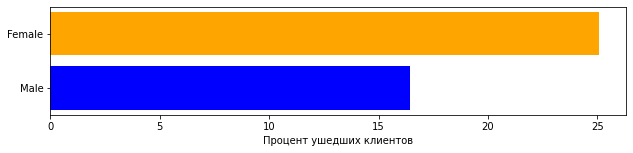

In [174]:

# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
# Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited 
# (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов)
mask1 = (churn_data['Gender']=='Male')
mask2 = (churn_data['Gender']=='Female')
fig = plt.figure(figsize=(8, 1.5))
axes = fig.add_axes([0, 0, 1, 1])
axes.barh(
    y = ['Male','Female'],
    width = [churn_data[mask1]['Exited'].mean()*100,churn_data[mask2]['Exited'].mean()*100],
    color=['blue', 'orange'],
    height = [0.8,0.8]
    );
axes.set_xlabel('Процент ушедших клиентов')

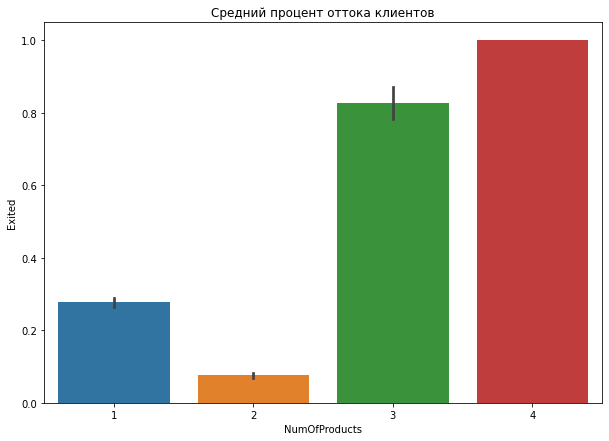

In [226]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='Exited',
)
barplot.set_title('Средний процент оттока клиентов');

У клиентов с большим количеством приобретенныч услуг фиксируется больший отток.

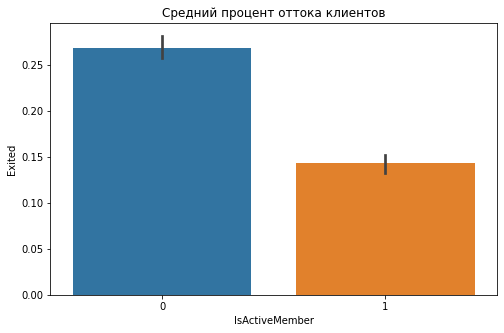

In [229]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. 
# Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?
fig = plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=churn_data,
    x='IsActiveMember',
    y='Exited',
)
barplot.set_title('Средний процент оттока клиентов');

У активных клиентов фиксируется вдвое меньший отток. Предлагается рассмотреть способы более активной работы с клиентами,
чтобы побудить их к активности.

In [300]:
# 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.
temp=churn_data.groupby('Geography')["Exited"].mean()
exit_by_countries=pd.DataFrame({'Geography':temp.index, 'Exited':temp.values})
fig = px.choropleth(
    data_frame=exit_by_countries, #датафрейм
    locations='Geography', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    color='Exited', #от чего зависит цвет
    range_color=[0, exit_by_countries['Exited'].max()],
    title='Доля ушедших пользователей по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)
fig.show()

Доля ушедших клиентов больше в Германии. Предположительно это связано с худшими условиями обслуживания в этой стране.

In [306]:
# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, 
# в течение которых клиент пользуется услугами банка (Tenure). 
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
# На основе полученной сводной таблицы постройте тепловую карту с аннотацией. 
# Найдите на тепловой карте категории клиентов, которые уходят чаще всего.
import numpy as np
def get_credit_score_cat(credit_score):
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)
CSPivot=churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
)

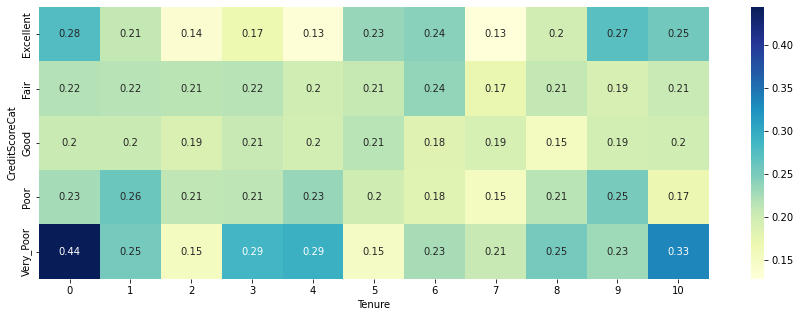

In [327]:
plt.figure(figsize=(15, 5))
heatmap = sns.heatmap(data=CSPivot, cmap='YlGnBu', annot = True)

Категории клиентов с плохой/кредитной историей чаще всего уходят.